In [1]:
import requests
import re
from bs4 import BeautifulSoup
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
URL = "https://finance.yahoo.com/quote/AMZN/history/"
Headers = {'User-Agent': "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/42.0.2311.135 Safari/537.36 Edge/12.246"}
res = requests.get(url = URL, headers = Headers)
soup = BeautifulSoup(res.text,"html.parser")
#print(res.content)
#print(soup.prettify)

In [3]:
head = soup.find('thead')
heads = head.find_all('th')
heads

[<th class="Ta(start) W(100px) Fw(400) Py(6px) Pend(6px)"><span>Date</span></th>,
 <th class="Fw(400) Py(6px) Pend(6px)"><span>Open</span></th>,
 <th class="Fw(400) Py(6px) Pend(6px)"><span>High</span></th>,
 <th class="Fw(400) Py(6px) Pend(6px)"><span>Low</span></th>,
 <th class="Fw(400) Py(6px) Pend(6px)"><span>Close*</span></th>,
 <th class="Fw(400) Py(6px) Pend(6px) Whs(nw)"><span>Adj Close**</span></th>,
 <th class="Fw(400) Py(6px) Pend(6px)"><span>Volume</span></th>]

In [4]:
headings = []
for i in range(len(heads)):
    for t in heads[i].find_all('span'):
        j = t.text.strip('*')
        headings.append(j)

In [5]:
headings

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [45]:
table = soup.find('tbody')
#datas = table.findAll('tr',attrs = {'class' : 'BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)'})
#print(datas[0])
val = table.findAll('span')
rows = table.find_all('tr')
print(len(rows))
print(rows[0])

data = {c:[] for c in headings}
for i in range(23,len(val)):
    j = val[i].text.strip().replace(',',"")
    if(i % 7 == 2):
        data[headings[i%7]].append(j)
    elif(i % 7 == 3):
        data[headings[i%7]].append(float(j))
    elif(i % 7 == 4):
        data[headings[i%7]].append(float(j))
    elif(i % 7 == 5):
         data[headings[i%7]].append(float(j))
    elif(i % 7 == 6):
         data[headings[i%7]].append(float(j))
    elif(i % 7 == 0):
        data[headings[i%7]].append(float(j))
    elif(i % 7 == 1):
        data[headings[i%7]].append(int(j))

100
<tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)"><td class="Py(10px) Ta(start) Pend(10px)"><span>Jun 08, 2022</span></td><td class="Py(10px) Pstart(10px)"><span>122.61</span></td><td class="Py(10px) Pstart(10px)"><span>123.75</span></td><td class="Py(10px) Pstart(10px)"><span>120.75</span></td><td class="Py(10px) Pstart(10px)"><span>121.18</span></td><td class="Py(10px) Pstart(10px)"><span>121.18</span></td><td class="Py(10px) Pstart(10px)"><span>64,828,200</span></td></tr>


In [46]:
import pandas as pd
df = pd.DataFrame(data)

In [47]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
91,144.54,155624000,Jan 24 2022,139.00,144.95,135.35,144.54
92,142.64,163972000,Jan 21 2022,149.95,150.90,142.07,142.64
93,151.67,71974000,Jan 20 2022,156.77,158.00,151.35,151.67
94,156.30,53242000,Jan 19 2022,158.76,159.25,156.25,156.30
95,158.92,67292000,Jan 18 2022,159.10,159.73,157.66,158.92


In [48]:
df =df.iloc[::-1]

In [49]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
158.92,67292000,Jan 18 2022,159.10,159.73,157.66,158.92
156.30,53242000,Jan 19 2022,158.76,159.25,156.25,156.30
151.67,71974000,Jan 20 2022,156.77,158.00,151.35,151.67
142.64,163972000,Jan 21 2022,149.95,150.90,142.07,142.64
144.54,155624000,Jan 24 2022,139.00,144.95,135.35,144.54


Text(0.5, 1.0, 'Amazon Stock Plot for Overall Period')

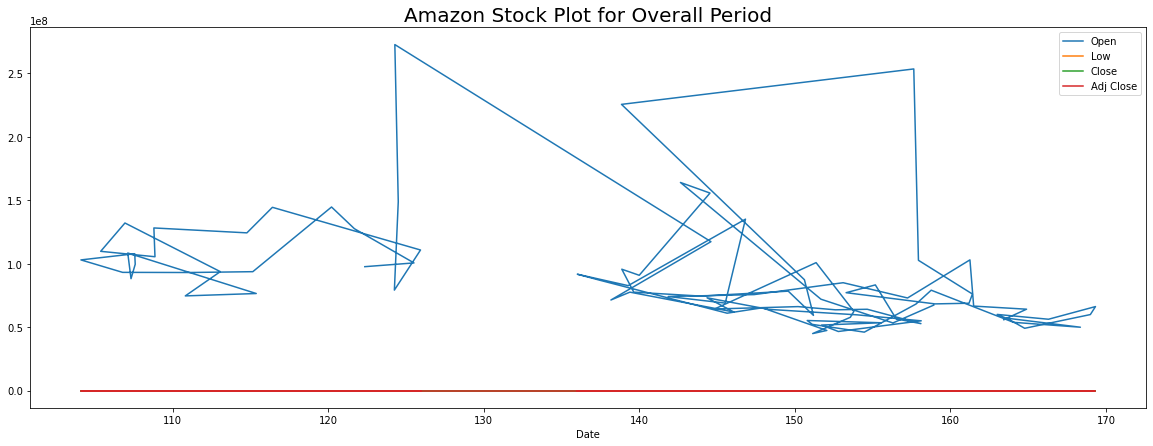

In [50]:
df[['Open', 'High', 'Low', 'Close', 'Adj Close']].plot(figsize = (20,7))
plt.title("Amazon Stock Plot for Overall Period", fontsize = 20)

In [51]:
file = pd.DataFrame(pd.read_csv('Amazon.csv'))
file.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
248,"Jun 01, 2021",3243.50,3250.98,3209.06,3218.65,3218.65,2430000
249,"May 28, 2021",3242.00,3247.99,3219.70,3223.07,3223.07,2329800
250,"May 27, 2021",3256.00,3260.36,3230.04,3230.11,3230.11,2561200
251,"May 26, 2021",3274.59,3295.73,3258.51,3265.16,3265.16,2384000
252,"May 25, 2021",3266.67,3279.82,3213.76,3259.05,3259.05,3261100


In [52]:
file = file.iloc[::-1]

In [53]:
file.set_index('Date', inplace=True)
file.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
"May 18, 2022",2228.79,2257.06,2124.98,2142.25,2142.25,5419000
"May 19, 2022",2125.61,2200.68,2123.86,2146.38,2146.38,4407100
"May 20, 2022",2191.37,2197.96,2100.19,2151.82,2151.82,4968200
"May 23, 2022",2169.22,2176.38,2079.00,2151.14,2151.14,5389900
May 24 2022,2080.50,2108.00,2025.20,2082.00,2082.00,5137100


Text(0.5, 1.0, 'Amazon Stock Plot for Overall Period')

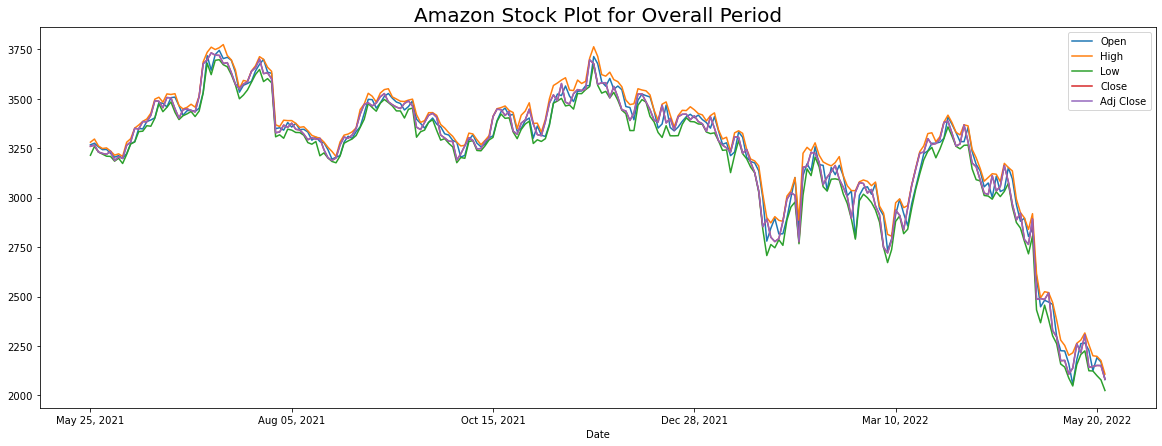

In [54]:
file[['Open', 'High', 'Low', 'Close', 'Adj Close']].plot(figsize = (20,7))
plt.title("Amazon Stock Plot for Overall Period", fontsize = 20)

### Top 5 days with Highest Stock Price

In [55]:
a = df.sort_values(by='High',ascending = False).head()
a['High']

Date
120.21    May 31 2022
115.15    May 27 2022
111.08    May 26 2022
106.78    May 25 2022
104.10    May 24 2022
Name: High, dtype: object

In [56]:
df['High'].sort_values(ascending = True).head()

Date
163.56    Apr 01 2022
168.35    Apr 04 2022
164.05    Apr 05 2022
158.76    Apr 06 2022
157.78    Apr 07 2022
Name: High, dtype: object

### Top 5 days with Lowest Stock Price 

In [57]:
b = df.sort_values(by='Low',ascending = True).head()
b['Low']

Date
106.93    102.75
106.78    103.66
104.10    104.03
107.32    106.28
111.08    107.97
Name: Low, dtype: float64

In [58]:
df['Low'].sort_values(ascending = True).head()

Date
106.93    102.75
106.78    103.66
104.10    104.03
107.32    106.28
111.08    107.97
Name: Low, dtype: float64

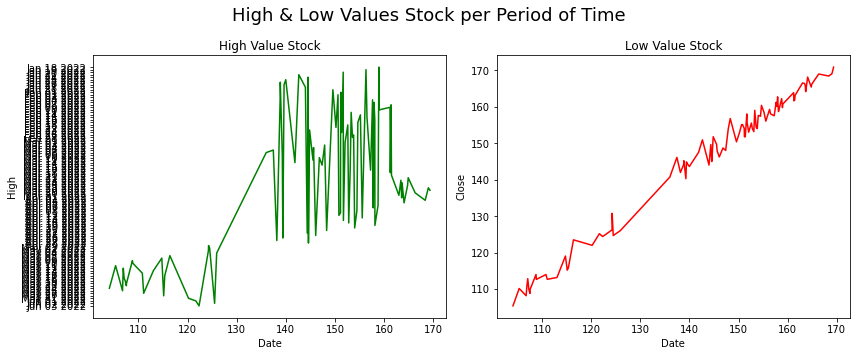

In [59]:
fig,axes= plt.subplots(nrows=1,ncols=2, sharex=True, figsize=(12,5))
fig.suptitle('High & Low Values Stock per Period of Time',fontsize=18)
sns.lineplot(ax= axes[0], y=df['High'],x=df.index, color='green')
axes[0].set_title('High Value Stock')
sns.lineplot(ax= axes[1], y=df['Close'], x=df.index, color='red')
axes[1].set_title('Low Value Stock')
plt.tight_layout()
plt.show()

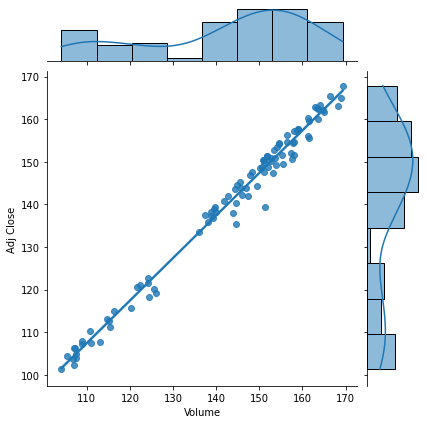

In [60]:
sns.jointplot(x = 'Volume',y = "Adj Close",data = df,kind = 'reg')

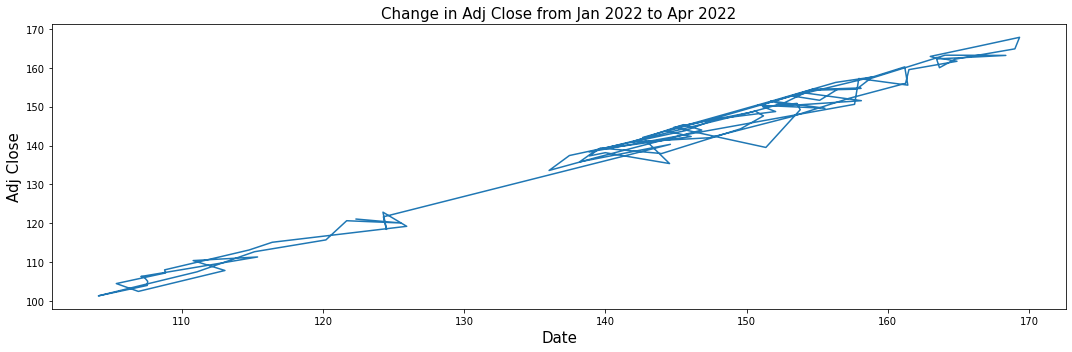

In [61]:
plt.figure(figsize = (15,5))
df['Adj Close'].plot()
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Adj Close',fontsize = 15)
plt.title('Change in Adj Close from Jan 2022 to Apr 2022',fontsize= 15)
plt.tight_layout()

In [62]:
df['Daily_returns'] = df['Adj Close'].pct_change() #Pandas dataframe.pct_change() function calculates the percentage change between the current and a prior element.
df.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_returns
Date,,,,,,,
158.92,67292000,Jan 18 2022,159.10,159.73,157.66,158.92,NaN
156.30,53242000,Jan 19 2022,158.76,159.25,156.25,156.30,-0.008943
151.67,71974000,Jan 20 2022,156.77,158.00,151.35,151.67,-0.031360
142.64,163972000,Jan 21 2022,149.95,150.90,142.07,142.64,-0.061315
144.54,155624000,Jan 24 2022,139.00,144.95,135.35,144.54,-0.047301


### Best Day of Stock

In [63]:
df[df['Daily_returns']==df['Daily_returns'].max()]['Daily_returns']

Date
157.64    0.088773
Name: Daily_returns, dtype: float64

### Worst Day of Stock

In [64]:
df[df['Daily_returns']==df['Daily_returns'].min()]['Daily_returns']

Date
124.28   -0.133072
Name: Daily_returns, dtype: float64

Text(0.5, 1.0, 'Amazon Stock Daily Returns')

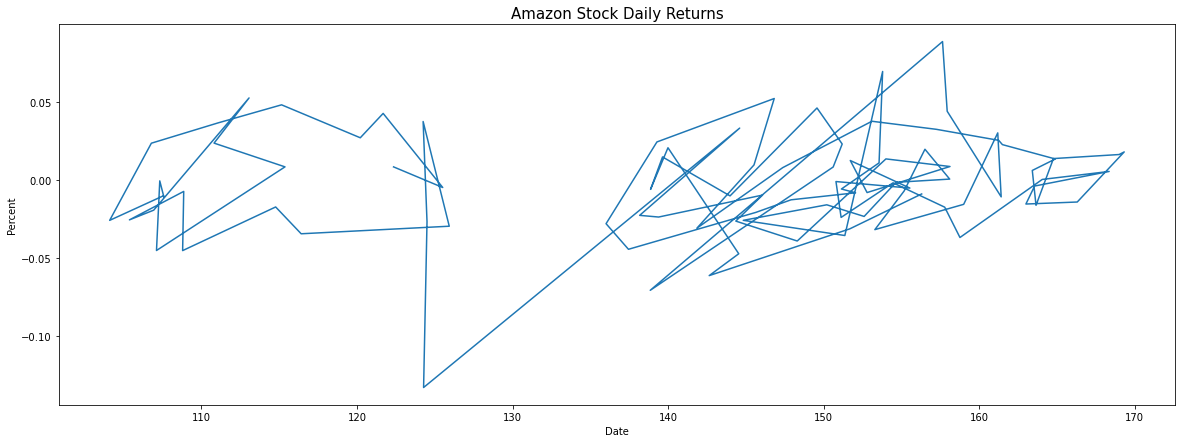

In [65]:
plt.figure(figsize=(20,7))
df['Daily_returns'].plot()
plt.xlabel("Date")
plt.ylabel("Percent")
plt.title("Amazon Stock Daily Returns",fontsize= 15 )

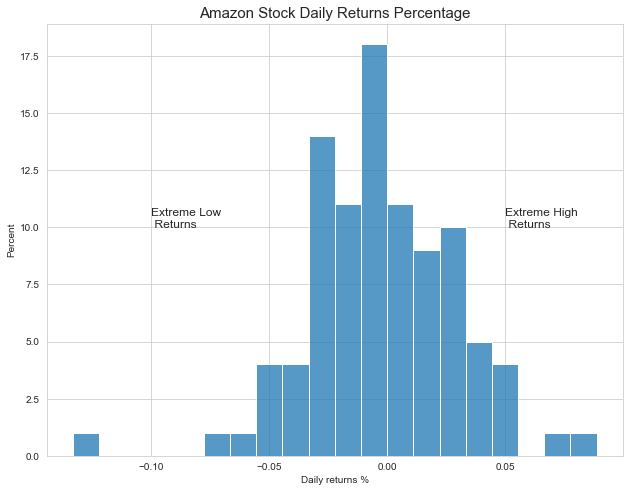

In [66]:
sns.set_style('whitegrid')
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_axes([0.1,0.1,1,1])
sns.histplot(data= df['Daily_returns'], bins=20)
ax1.set_xlabel("Daily returns %")
ax1.set_ylabel("Percent")
ax1.set_title("Amazon Stock Daily Returns Percentage",fontsize= 15 )
ax1.text(-0.1,10,"Extreme Low\n Returns",fontsize= 12)
ax1.text(0.05,10,"Extreme High\n Returns", fontsize= 12)
plt.show()

## Amazon Stock Cumulative Returns

In [67]:
df['Cum_returns']= (df['Daily_returns']+1).cumprod()
df.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_returns,Cum_returns
Date,,,,,,,,
158.92,67292000,Jan 18 2022,159.10,159.73,157.66,158.92,NaN,NaN
156.30,53242000,Jan 19 2022,158.76,159.25,156.25,156.30,-0.008943,0.991057
151.67,71974000,Jan 20 2022,156.77,158.00,151.35,151.67,-0.031360,0.959977
142.64,163972000,Jan 21 2022,149.95,150.90,142.07,142.64,-0.061315,0.901116
144.54,155624000,Jan 24 2022,139.00,144.95,135.35,144.54,-0.047301,0.858493


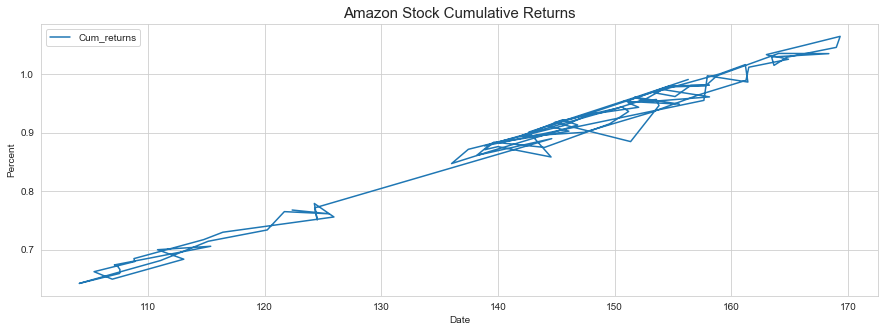

In [68]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,5))
df['Cum_returns'].plot()
plt.xlabel("Date")
plt.ylabel("Percent")
plt.title("Amazon Stock Cumulative Returns",fontsize= 15 )
plt.legend()

# Train and Test Data

In [69]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
X= df[['Open', 'High', 'Low', 'Close', 'Volume']]
y= df['Adj Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Scaling of Data 

In [70]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

NameError: name 'StandardScaler' is not defined

In [71]:
model = RandomForestRegressor(n_estimators=500, random_state=42, max_depth=10)
model.fit(X_train, y_train)
predict = model.predict(X_test)
print(predict)
print(predict.shape)

NameError: name 'RandomForestRegressor' is not defined

In [72]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {model.score(X_train, y_train) * 100:.2f}% and Test Score : {model.score(X_test, y_test) * 100:.2f}% using Random Tree Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

NameError: name 'metrics' is not defined

## Making Predictions 

In [73]:
predictions = pd.DataFrame({"Predictions": predict}, index=pd.date_range(start=df.index[-1], periods=len(predict), freq="D"))
predictions.to_csv("Predicted-price-data.csv")

#collecting future days from predicted values
oneyear_df = pd.DataFrame(predictions[:252])
oneyear_df.to_csv("one-year-predictions.csv")
onemonth_df = pd.DataFrame(predictions[:30])
onemonth_df.to_csv("one-month-predictions.csv")
sevendays_df = pd.DataFrame(predictions[:7])
sevendays_df.to_csv("seven-days-predictions.csv")

NameError: name 'predict' is not defined

In [74]:
print(predictions)

NameError: name 'predictions' is not defined

### One Year Prediction

Buy Date and Price of Stock
    Unnamed: 0  Predictions
27  2022-06-21   2168.60762 

Sell Date and Price of stock
    Unnamed: 0  Predictions
14  2022-06-08   3304.31158


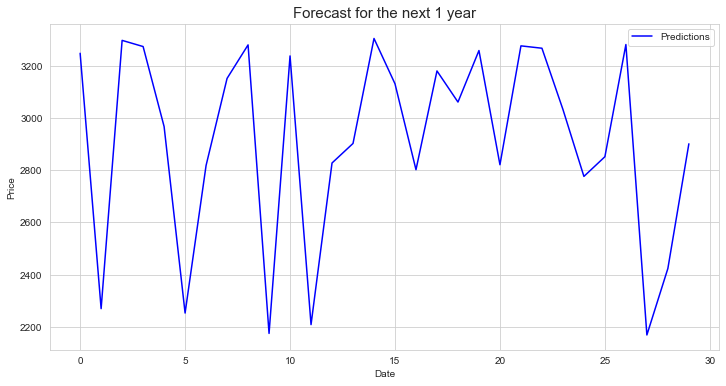

In [75]:
oneyear_df_pred = pd.read_csv("one-year-predictions.csv")
buy_price = min(oneyear_df_pred["Predictions"])
sell_price = max(oneyear_df_pred["Predictions"])
oneyear_buy = oneyear_df_pred.loc[oneyear_df_pred["Predictions"] == buy_price]
oneyear_sell = oneyear_df_pred.loc[oneyear_df_pred["Predictions"] == sell_price]
print("Buy Date and Price of Stock")
print(oneyear_buy,'\n')
print("Sell Date and Price of stock")
print(oneyear_sell)
oneyear_df_pred["Predictions"].plot(figsize=(12, 6), color="blue")
plt.title("Forecast for the next 1 year", size=15)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

### One Month Prediction 

Buy price and date
    Unnamed: 0  Predictions
27  2022-06-21   2168.60762 

Sell price and date
    Unnamed: 0  Predictions
14  2022-06-08   3304.31158


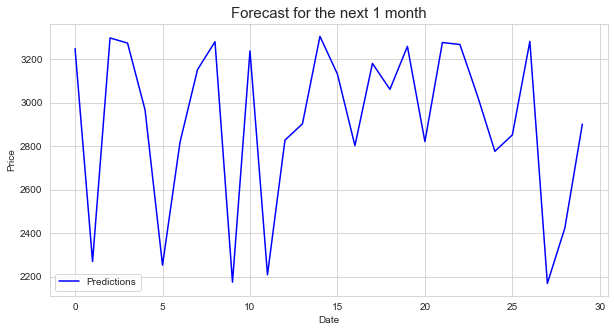

In [76]:
onemonth_df_pred = pd.read_csv("one-month-predictions.csv")
buy_price = min(onemonth_df_pred["Predictions"])
sell_price = max(onemonth_df_pred["Predictions"])
onemonth_buy = onemonth_df_pred.loc[onemonth_df_pred["Predictions"] == buy_price]
onemonth_sell = onemonth_df_pred.loc[onemonth_df_pred["Predictions"] == sell_price]
print("Buy price and date")
print(onemonth_buy,'\n')
print("Sell price and date")
print(onemonth_sell)
onemonth_df_pred["Predictions"].plot(figsize=(10, 5), color="blue")
plt.title("Forecast for the next 1 month", size=15)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

### One Week Prediction 

Buy price and date
   Unnamed: 0  Predictions
5  2022-05-30   2252.64176 

Sell price and date
   Unnamed: 0  Predictions
2  2022-05-27    3296.9866


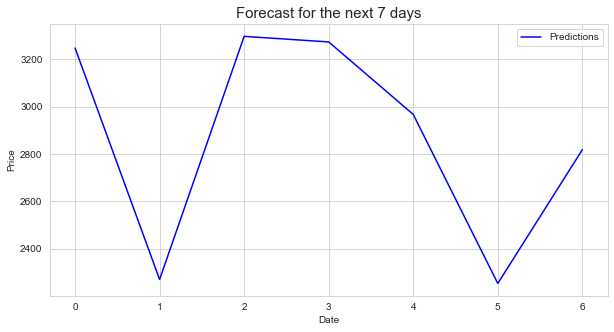

In [77]:
sevendays_df_pred = pd.read_csv("seven-days-predictions.csv")
buy_price = min(sevendays_df_pred["Predictions"])
sell_price = max(sevendays_df_pred["Predictions"])
sevendays_buy = sevendays_df_pred.loc[sevendays_df_pred["Predictions"] == buy_price]
sevendays_sell = sevendays_df_pred.loc[sevendays_df_pred["Predictions"] == sell_price]
print("Buy price and date")
print(sevendays_buy,'\n')
print("Sell price and date")
print(sevendays_sell)
sevendays_df_pred["Predictions"].plot(figsize=(10, 5), color="blue")
plt.title("Forecast for the next 7 days",size=15)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

import requests
from bs4 import BeautifulSoup
def ms_jobs():
    url = 'https://careers.microsoft.com/us/en/search-results?rk=l-hyderabad'
    resp = requests.get(url)

    if resp.status_code == 200:
        print("Successfully opened the web page")
        soup = BeautifulSoup(resp.text, 'html.parser')
        print(soup)
    else:
        print("Error")

ms_jobs()

URL = "https://finance.yahoo.com/quote/AMZN/history/"
Headers = {'User-Agent': "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/42.0.2311.135 Safari/537.36 Edge/12.246"}
res = requests.get(url = URL, headers = Headers)
soup = BeautifulSoup(res.text,"html.parser")
#print(res.content)
#print(soup.prettify)
table = soup.find('tbody')
#datas = table.findAll('tr',attrs = {'class' : 'BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)'})
#print(datas[0])
val = table.findAll('span')
print(val)
data = {c:[] for c in headings}
for i in range(len(val)):
    j = val[i].text.strip().replace(',',"")
    if(i % 7 == 0):
        data[headings[i%7]].append(j)
    elif(i % 7 == 1):
        data[headings[i%7]].append(float(j))
    elif(i % 7 == 2):
        data[headings[i%7]].append(float(j))
    elif(i % 7 == 3):
         data[headings[i%7]].append(float(j))
    elif(i % 7 == 4):
         data[headings[i%7]].append(float(j))
    elif(i % 7 == 5):
        data[headings[i%7]].append(float(j))
    elif(i % 7 == 6):
        data[headings[i%7]].append(int(j))

for i in range(len(rows)):
    for t in rows[i].find_all('span'):
        j = t.text.strip().replace(',',"")
        if(i % 7 == 0):
            data[headings[i%7]].append(j)
        elif(i % 7 == 1):
            data[headings[i%7]].append(float(j))
        elif(i % 7 == 2):
            data[headings[i%7]].append(float(j))
        elif(i % 7 == 3):
            data[headings[i%7]].append(float(j))
        elif(i % 7 == 4):
            data[headings[i%7]].append(float(j))
        elif(i % 7 == 5):
            data[headings[i%7]].append(float(j))
        elif(i % 7 == 6):
            data[headings[i%7]].append(int(j))